In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('flights.csv')

In [9]:
df.tail()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
336765,336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,...,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,JetBlue Airways
336766,336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,...,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,JetBlue Airways
336767,336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,...,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,JetBlue Airways
336768,336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,...,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,JetBlue Airways
336769,336769,2013,9,30,2349.0,2359,-10.0,325.0,350,-25.0,...,745,N516JB,JFK,PSE,196.0,1617,23,59,2013-09-30 23:00:00,JetBlue Airways


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [5]:
df.isna().sum()

,0
id,0
year,0
month,0
day,0
dep_time,8255
sched_dep_time,0
dep_delay,8255
arr_time,8713
sched_arr_time,0
arr_delay,9430


In [6]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              327346 non-null  int64  
 1   year            327346 non-null  int64  
 2   month           327346 non-null  int64  
 3   day             327346 non-null  int64  
 4   dep_time        327346 non-null  float64
 5   sched_dep_time  327346 non-null  int64  
 6   dep_delay       327346 non-null  float64
 7   arr_time        327346 non-null  float64
 8   sched_arr_time  327346 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         327346 non-null  object 
 11  flight          327346 non-null  int64  
 12  tailnum         327346 non-null  object 
 13  origin          327346 non-null  object 
 14  dest            327346 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        327346 non-null  int64  
 17  hour           

In [11]:
import numpy as np

df['flight_status'] = np.where(df['arr_delay'] > 0, 'Delayed',
                                       np.where(df['arr_delay'] < 0, 'Early', 'On Time'))

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['day_of_week'] = df['date'].dt.day_name()

def time_period(time):
    if np.isnan(time):
        return np.nan
    hour = int(time // 100)
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['dep_period'] = df['dep_time'].apply(time_period)
df['arr_period'] = df['arr_time'].apply(time_period)

df['total_delay'] = df['dep_delay'].fillna(0) + df['arr_delay'].fillna(0)

df.drop(columns=['date'], inplace=True)

df.head()


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,distance,hour,minute,time_hour,name,flight_status,day_of_week,dep_period,arr_period,total_delay
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.,Delayed,Tuesday,Morning,Morning,13.0
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.,Delayed,Tuesday,Morning,Morning,24.0
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.,Delayed,Tuesday,Morning,Morning,35.0
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,1576,5,45,2013-01-01 05:00:00,JetBlue Airways,Early,Tuesday,Morning,Morning,-19.0
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.,Early,Tuesday,Morning,Morning,-31.0


<ipython-input-13-5deefbd31b65>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='flight_status', data=df, palette='viridis')


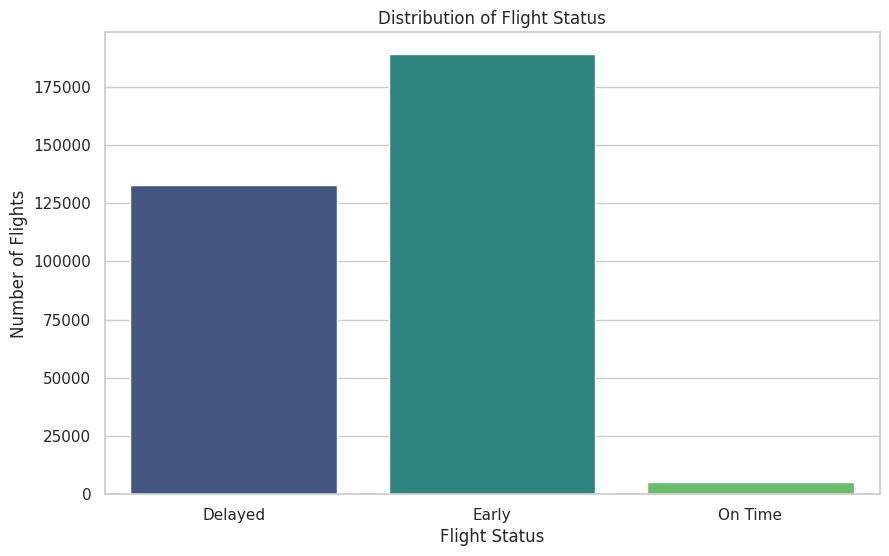

<ipython-input-13-5deefbd31b65>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='muted')


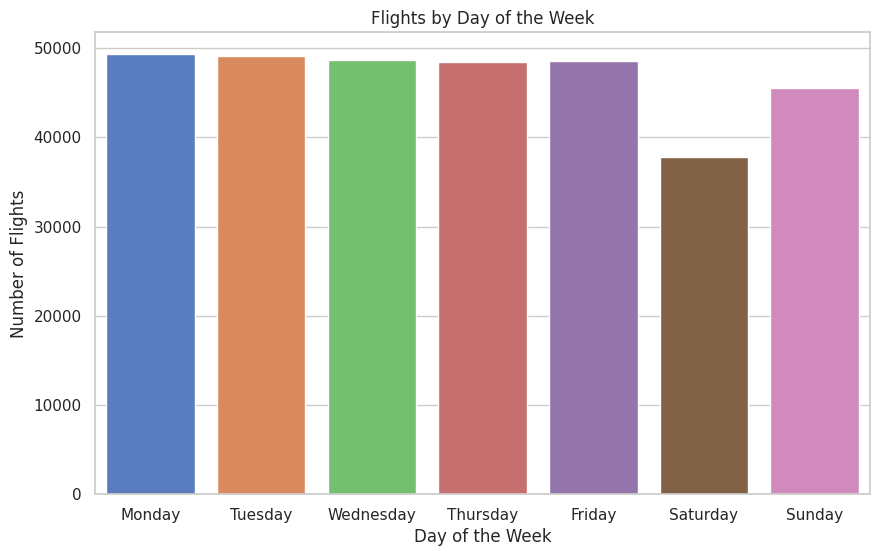

<ipython-input-13-5deefbd31b65>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dep_period', data=df, palette='coolwarm')


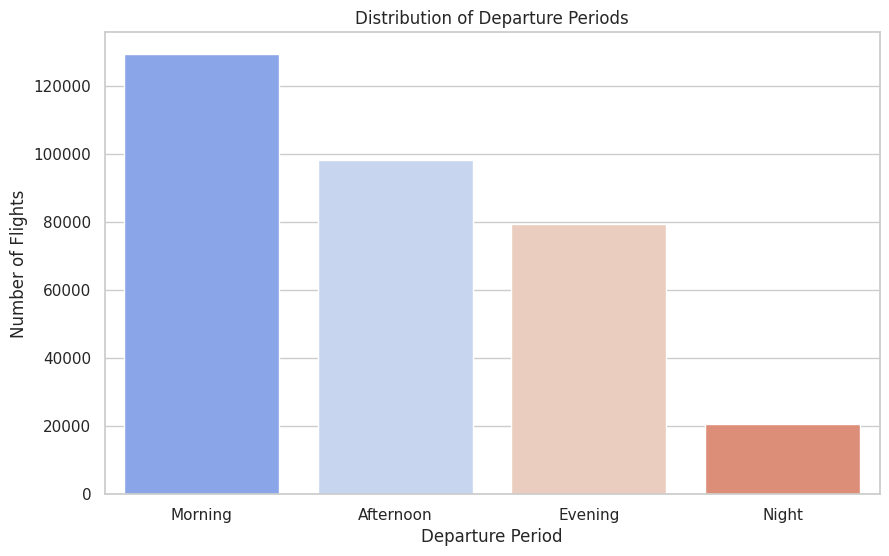

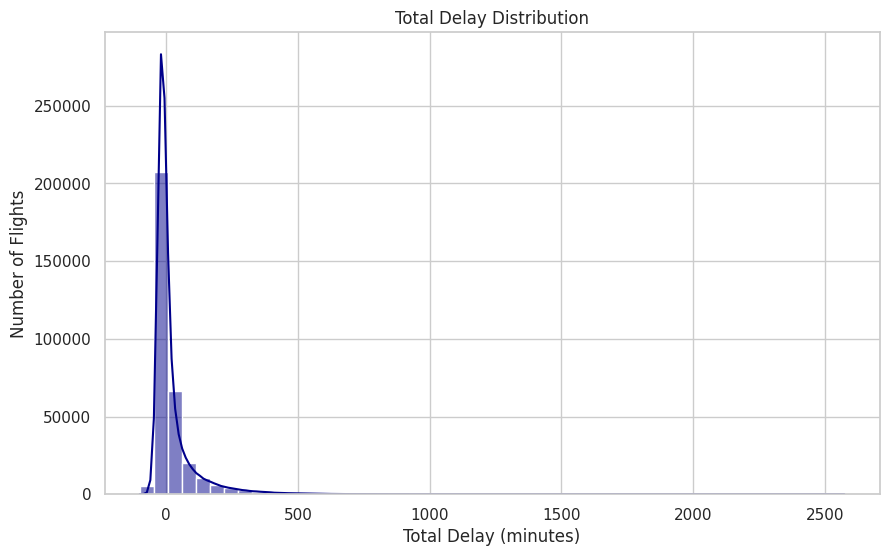

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='flight_status', data=df, palette='viridis')
plt.title('Distribution of Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Number of Flights')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='muted')
plt.title('Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='dep_period', data=df, palette='coolwarm')
plt.title('Distribution of Departure Periods')
plt.xlabel('Departure Period')
plt.ylabel('Number of Flights')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['total_delay'].dropna(), bins=50, kde=True, color='darkblue')
plt.title('Total Delay Distribution')
plt.xlabel('Total Delay (minutes)')
plt.ylabel('Number of Flights')
plt.show()
